In [3]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

%matplotlib inline

In [4]:
data=pd.read_csv("TravelInsurancePrediction.csv")

In [5]:
data

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [6]:
data.columns

Index(['Unnamed: 0', 'Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [7]:
data.isna().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [8]:
data.dtypes

Unnamed: 0              int64
Age                     int64
Employment Type        object
GraduateOrNot          object
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer          object
EverTravelledAbroad    object
TravelInsurance         int64
dtype: object

In [9]:
data.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


# Dropping Unnamed: 0 column
### data.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
data.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [11]:
data['GraduateOrNot'].value_counts()

Yes    1692
No      295
Name: GraduateOrNot, dtype: int64

### Heatmap for the Travel Insurance Prediciton System:-

<AxesSubplot:>

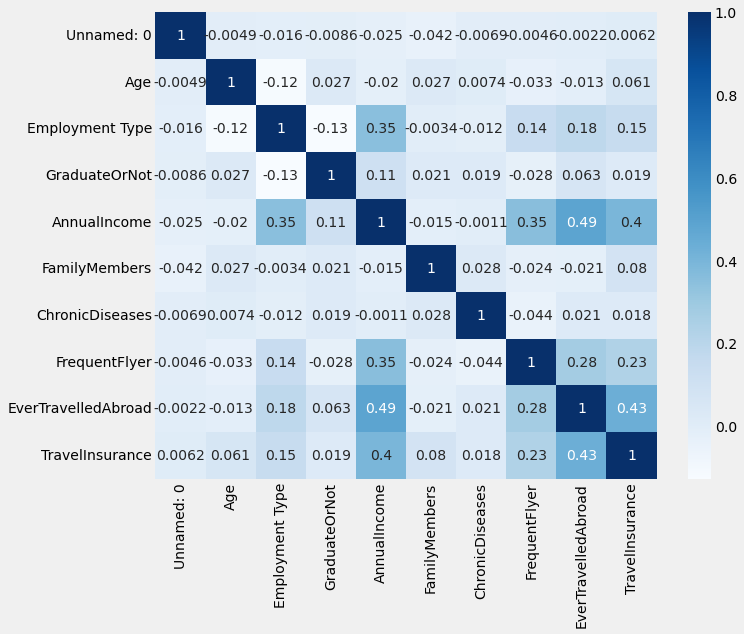

In [77]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),cbar=True,annot=True,cmap='Blues')

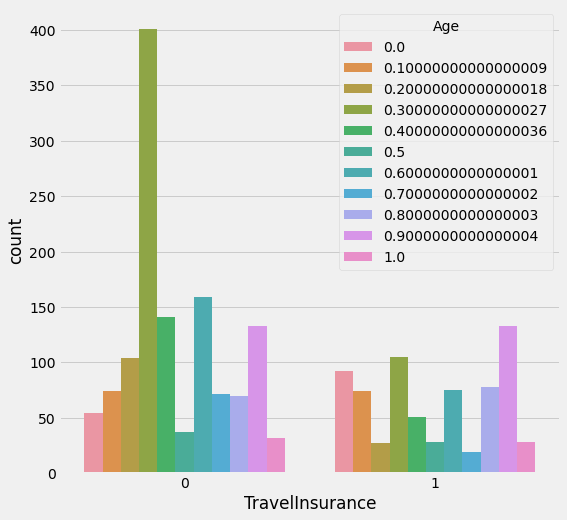

In [78]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(hue='Age',x='TravelInsurance',data=data)
plt.show()

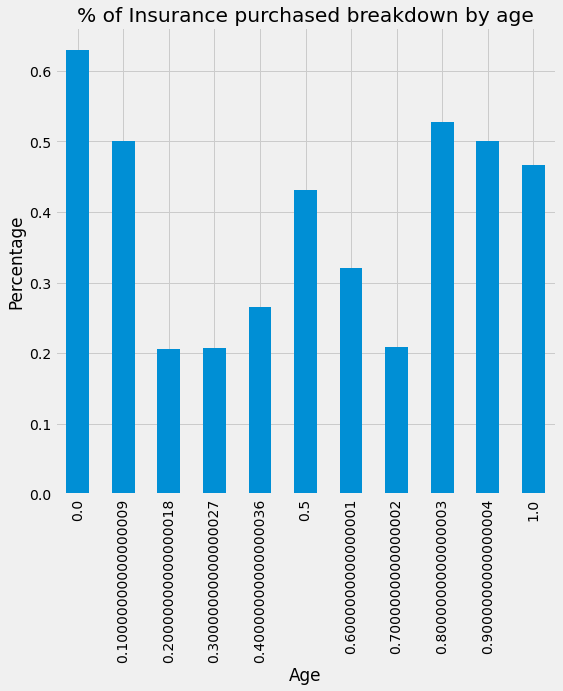

In [79]:
fig, ax = plt.subplots(figsize=(8,8))
(data.groupby('Age').sum()['TravelInsurance']/data.groupby('Age').count()['TravelInsurance']).plot(kind='bar') 
plt.title('% of Insurance purchased breakdown by age')
plt.ylabel('Percentage')
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


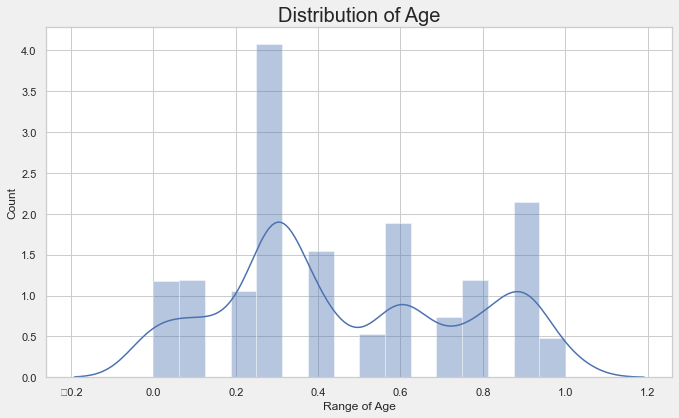

In [80]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

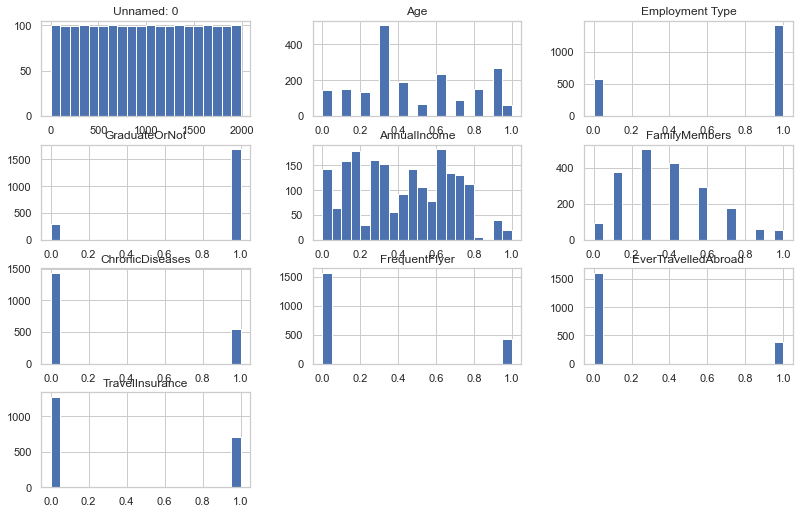

In [83]:
data.hist(figsize=(12,8),bins=20)
plt.show()

<AxesSubplot:>

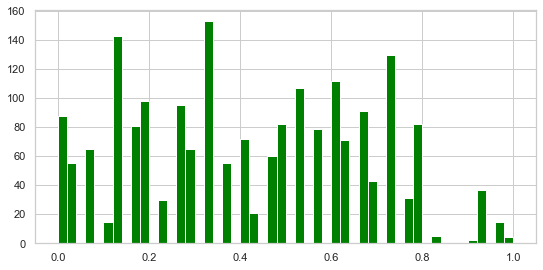

In [84]:
data['AnnualIncome'].hist(color='green',bins=50,figsize=(8,4))

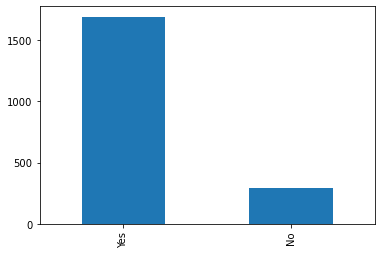

In [12]:
data['GraduateOrNot'].value_counts().plot(kind='bar')
plt.style.use('fivethirtyeight')
plt.show()

### Age Group with respect to GraduateOrNot

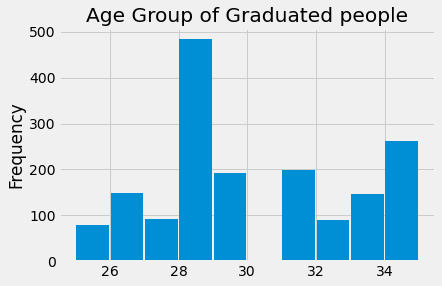

In [14]:
plt.title('Age Group of Graduated people')
plt.style.use('fivethirtyeight')
data['Age'][data['GraduateOrNot'] == 'Yes'].plot(kind='hist', rwidth=0.95)
plt.show()

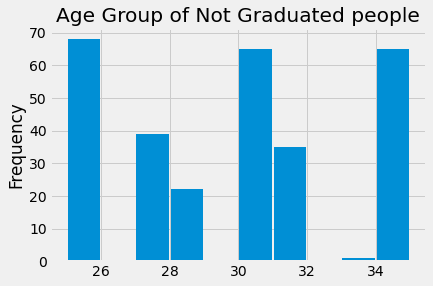

In [16]:
plt.title('Age Group of Not Graduated people')
plt.style.use('fivethirtyeight')
data['Age'][data['GraduateOrNot'] == 'No'].plot(kind='hist', rwidth=0.95)
plt.show()

In [17]:
data['Employment Type'].unique()

array(['Government Sector', 'Private Sector/Self Employed'], dtype=object)

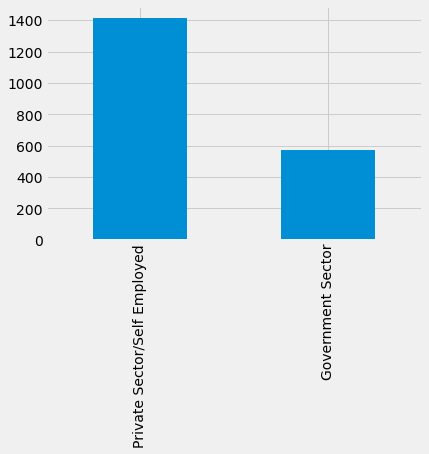

In [18]:
plt.style.use('fivethirtyeight')
data['Employment Type'].value_counts().plot(kind='bar')
plt.show()

### Annual Income of Government and Private Employees

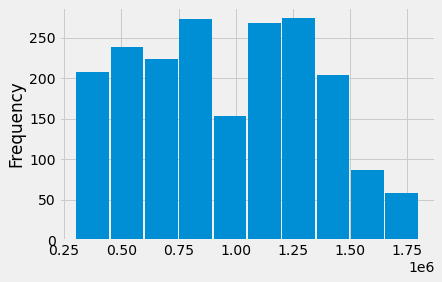

In [19]:
data['AnnualIncome'].plot(kind='hist', rwidth=0.95)
plt.show()

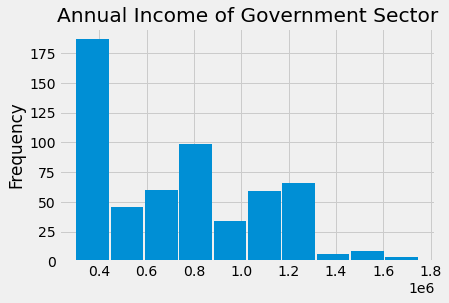

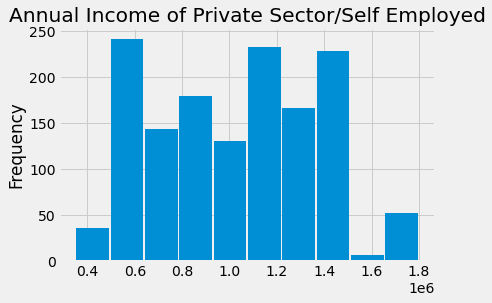

In [21]:
emp_type = ['Government Sector', 'Private Sector/Self Employed']

for typ in emp_type:
    plt.title(f'Annual Income of {typ}')
    data['AnnualIncome'][data['Employment Type'] == typ].plot(kind='hist', rwidth=0.95)
    plt.show()
    print('\n')

### FamilyMembers

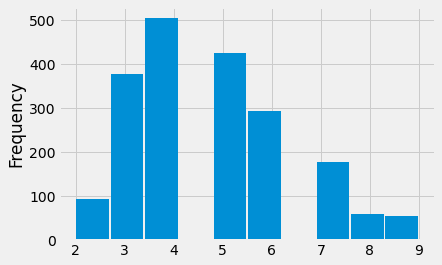

In [22]:
data['FamilyMembers'].plot(kind='hist', rwidth=0.95)
plt.show()

### FrequentFlyer

In [23]:
data['FrequentFlyer'].unique()

array(['No', 'Yes'], dtype=object)

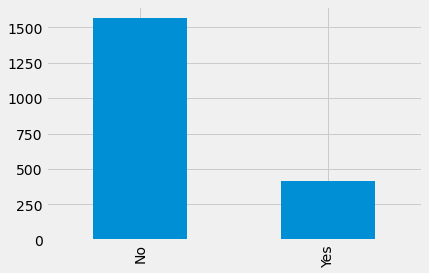

In [24]:
data['FrequentFlyer'].value_counts().plot(kind='bar')
plt.show()

### EverTravelledAbroad

In [25]:
data['EverTravelledAbroad'].unique()

array(['No', 'Yes'], dtype=object)

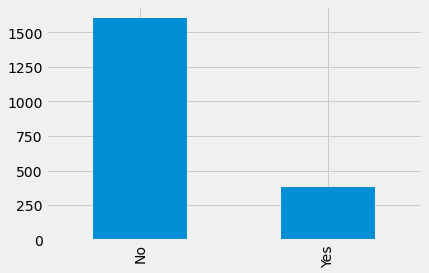

In [26]:
data['EverTravelledAbroad'].value_counts().plot(kind='bar')
plt.show()

### FrequentFlyers with respect to EverTravelledAbroad

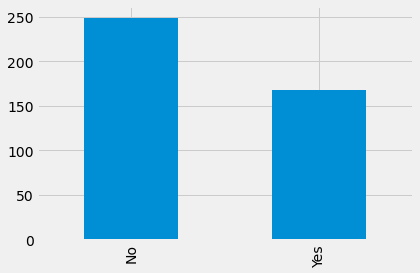

In [28]:
data['EverTravelledAbroad'][data['FrequentFlyer'] == 'Yes'].value_counts().plot(kind='bar')
plt.show()

### Non FrequentFlyers with respect to EverTravelledAbroad

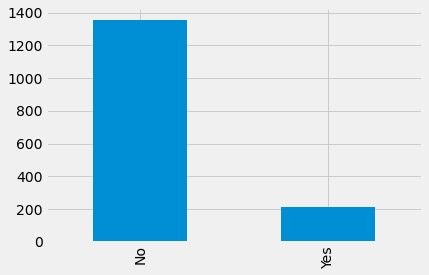

In [29]:
data['EverTravelledAbroad'][data['FrequentFlyer'] == 'No'].value_counts().plot(kind='bar')
plt.show()

### As we can see FrequentFlyer are more tend travel abroad

### TravelInsurance

In [30]:
data['TravelInsurance'].unique()

array([0, 1], dtype=int64)

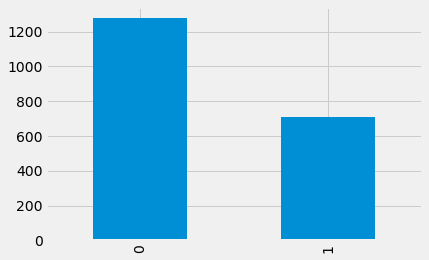

In [31]:
data['TravelInsurance'].value_counts().plot(kind='bar')
plt.show()

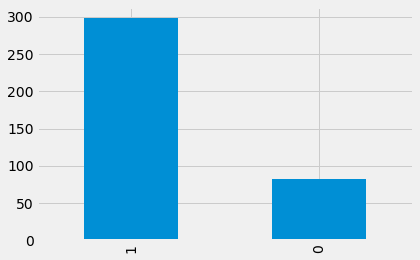

In [34]:
data['TravelInsurance'][data['EverTravelledAbroad'] == 'Yes'].value_counts().plot(kind='bar')
plt.show()
plt.show()

### TravelInsurance and EverTravelledAbroad

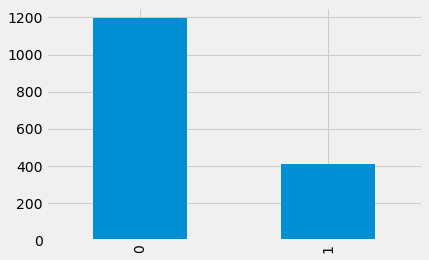

In [35]:
data['TravelInsurance'][data['EverTravelledAbroad'] == 'No'].value_counts().plot(kind='bar')
plt.show()

### As we can see Abroad Travellers are most likely to have Travel Insurance

# ChronicDiseases

In [36]:
data['ChronicDiseases'].unique()

array([1, 0], dtype=int64)

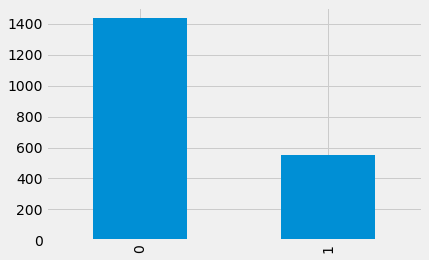

In [37]:
data['ChronicDiseases'].value_counts().plot(kind='bar')
plt.show()

### Chronic Disease in frequent flyers

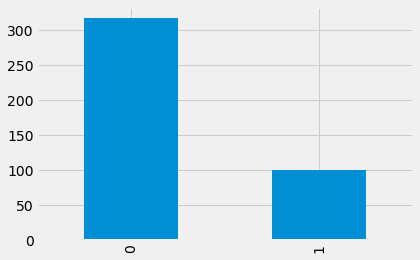

In [38]:
data['ChronicDiseases'][data['FrequentFlyer'] == 'Yes'].value_counts().plot(kind='bar')
plt.show()

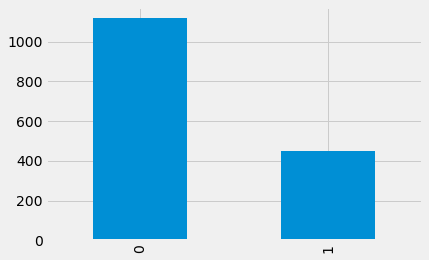

In [39]:
data['ChronicDiseases'][data['FrequentFlyer'] == 'No'].value_counts().plot(kind='bar')
plt.show()

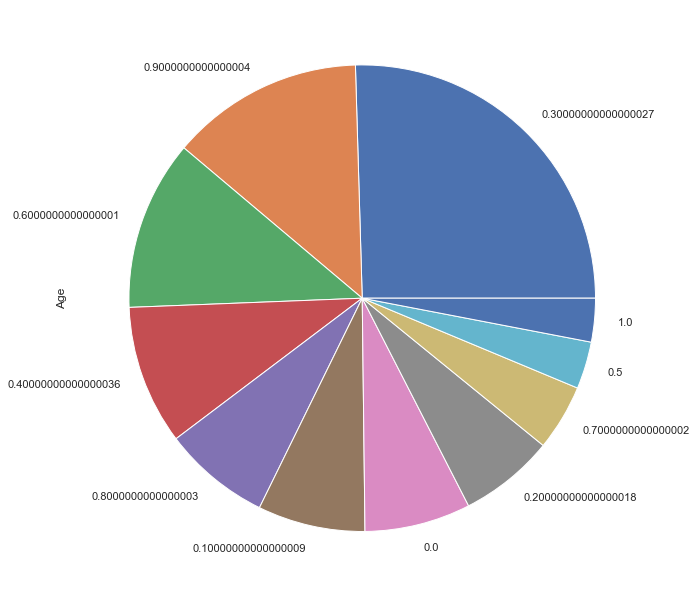

In [81]:
plt.figure(figsize=(30, 10))
data.Age.value_counts(normalize=True)
data.Age.value_counts(normalize=True).plot.pie()
plt.show()

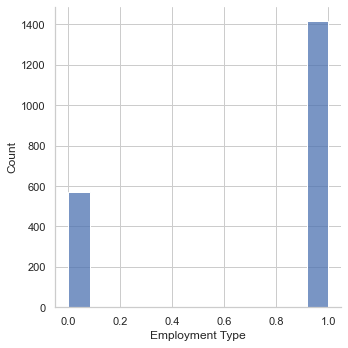

In [82]:
sns.displot(data['Employment Type'])
plt.show()

### Chronic Diseases are more in Non frequent flyers
# Encoding Object Data Values

In [40]:
data.dtypes[data.dtypes == 'object']

Employment Type        object
GraduateOrNot          object
FrequentFlyer          object
EverTravelledAbroad    object
dtype: object

In [41]:
data['Employment Type'].unique()

array(['Government Sector', 'Private Sector/Self Employed'], dtype=object)

In [44]:

['Employment Type'].replace(['Government Sector', 'Private Sector/Sedatalf Employed'],[0, 1],inplace=True)

In [45]:
data['GraduateOrNot'].unique()

array(['Yes', 'No'], dtype=object)

In [46]:
data['GraduateOrNot'].replace(['Yes', 'No'], [1, 0], inplace=True)

In [47]:
data['FrequentFlyer'].unique()

array(['No', 'Yes'], dtype=object)

In [48]:
data['FrequentFlyer'].replace(['Yes', 'No'], [1, 0], inplace=True)

In [49]:
data['EverTravelledAbroad'].unique()

array(['No', 'Yes'], dtype=object)

In [50]:
data['EverTravelledAbroad'].replace(['Yes', 'No'], [1, 0], inplace=True)

## Scaling Age, Annual Income and Family Members

In [52]:
cols_to_scale = ['Age', 'AnnualIncome', 'FamilyMembers']
scale = MinMaxScaler()
scale.fit(data[cols_to_scale])

MinMaxScaler()

In [54]:
scaled = scale.fit_transform(data[cols_to_scale])

In [56]:
for i in range(3):
    data[cols_to_scale[i]] = scaled[:,i]

In [57]:
data.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,0.6,0,1,0.066667,0.571429,1,0,0,0
1,1,0.6,1,1,0.633333,0.714286,0,0,0,0
2,2,0.9,1,1,0.133333,0.285714,1,0,0,1
3,3,0.3,1,1,0.266667,0.142857,1,0,0,0
4,4,0.3,1,1,0.266667,0.857143,1,1,0,0


In [58]:
x, y = data.drop('TravelInsurance',axis=1),data['TravelInsurance']

In [59]:
x.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,0,0.6,0,1,0.066667,0.571429,1,0,0
1,1,0.6,1,1,0.633333,0.714286,0,0,0
2,2,0.9,1,1,0.133333,0.285714,1,0,0
3,3,0.3,1,1,0.266667,0.142857,1,0,0
4,4,0.3,1,1,0.266667,0.857143,1,1,0


In [60]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: TravelInsurance, dtype: int64

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [62]:
x_train.shape, x_test.shape

((1390, 9), (597, 9))

In [63]:
y_train.value_counts()

0    894
1    496
Name: TravelInsurance, dtype: int64

In [64]:
y_test.value_counts()

0    383
1    214
Name: TravelInsurance, dtype: int64

In [70]:

model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

y_pred_test[y_pred_test >= 0.5] = 1
y_pred_test[y_pred_test < 0.5] = 0

y_pred_train[y_pred_train >= 0.5] = 1
y_pred_train[y_pred_train < 0.5] = 0
    

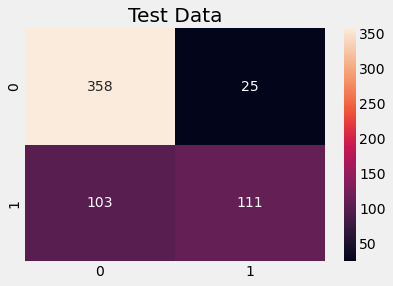

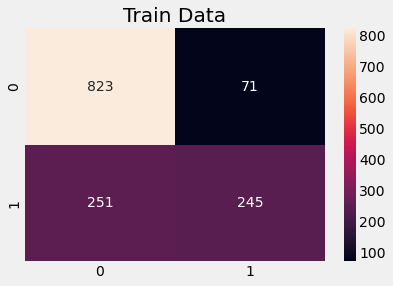

In [72]:
plt.title('Test Data')
sns.heatmap(confusion_matrix(y_test,y_pred_test), annot=True, fmt='g')
plt.show()
print('\n')
plt.title('Train Data')
sns.heatmap(confusion_matrix(y_train,y_pred_train), annot=True, fmt='g', )
plt.show()

In [73]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       383
           1       0.82      0.52      0.63       214

    accuracy                           0.79       597
   macro avg       0.80      0.73      0.74       597
weighted avg       0.79      0.79      0.77       597



In [74]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       894
           1       0.78      0.49      0.60       496

    accuracy                           0.77      1390
   macro avg       0.77      0.71      0.72      1390
weighted avg       0.77      0.77      0.75      1390



### Because of imbalance in data the accuracy is not improving

Linear regression model is the best model in AIML beacuse the Linear regression is suitable for problems where we want to predict a certain numerical value,prediction where we use logistic regression

A travel insurance policy is one which covers the financial losses that you might suffer when you are travelling. Travel insurance plans cover you for the duration of your trip and help you meet with financial emergencies that you might face on such a trip. These plans cover trips taken abroad